In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

plt.style.use('fivethirtyeight')


plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

%matplotlib inline


## PART 1

### 1)

In [11]:
#read datasets
btc_price = pd.read_csv('../data/BTCPrice.csv', index_col=['Date'])
btc_price.columns = ['PRICE']

btc_trd_vol = pd.read_csv('../data/BTCTransactionVolume.csv', index_col=['Date'])
btc_trd_vol.columns = [ 'TRD_VOLUME']

btc_miner_fees =  pd.read_csv('../data/BTCtransaction-fees.csv', index_col=['Date'])
btc_miner_fees.columns = ['MINERS_FEE']


btc_transaction_vol = pd.read_csv('../data/BTCTransactionVolume.csv', index_col=['Date'])
btc_transaction_vol.columns = ['TRAN_VOL']

btc_price_vol = pd.read_csv('../data/BTCprice-volatility.csv', index_col=['Date'])
btc_price_vol.columns = ['PRICE_VOL']

btc_miner_revenue =  pd.read_csv('../data/BTCminer-revenue.csv', index_col=['Date'])
btc_miner_revenue.columns = ['MINERS_REVENUE']

btc_difficulty = pd.read_csv('../data/BTCDifficulty.csv', index_col=['Date'])
btc_difficulty.columns = ['DIFFICULTY']

btc_transaction_per_block = pd.read_csv('../data/BTCTransactionPerBlock.csv', index_col=['Date'])
btc_transaction_per_block.columns = ['TRAN_BLOCK']

btc_hash_rate = pd.read_csv('../data/BTChash-rate.csv', index_col=['Date'])
btc_hash_rate.columns = ['HASH_RATE'] 

bch_price =  pd.read_csv('../data/BCHprice.csv', index_col=['Date'])
bch_price.columns = ['BCH_PRICE']

btc_money_supply =  pd.read_csv('../data/BTCmoney-supply.csv', index_col=['Date'])
btc_money_supply.columns = ['MONEY_SUPPLY']

btc_market_cap =  pd.read_csv('../data/BTCmarket-cap.csv', index_col=['Date'])
btc_market_cap.columns = ['MARKET_CAP']

btc_data = pd.concat([btc_price, btc_trd_vol, btc_miner_fees, btc_transaction_vol, btc_price_vol,
                     btc_miner_revenue, btc_difficulty, btc_transaction_per_block, btc_hash_rate,
                     btc_market_cap, btc_money_supply, bch_price], axis=1, sort=True)
btc_data.index= pd.to_datetime(btc_data.index, format='%Y-%m-%d')
btc_data = btc_data.loc[(btc_data.index >= '2010-01-01') & (btc_data.index <= '2019-06-30')]

In [12]:
btc_data.head(10)

,PRICE,TRD_VOLUME,MINERS_FEE,TRAN_VOL,PRICE_VOL,MINERS_REVENUE,DIFFICULTY,TRAN_BLOCK,HASH_RATE,MARKET_CAP,MONEY_SUPPLY,BCH_PRICE
2010-01-01,0.0,0.0,0.0,0.0,NaN,6900.0,1.0,1.0,0.000008,0.0,1624700.0,0.0
2010-01-02,0.0,100.0,0.0,100.0,NaN,6600.0,1.0,1.0,0.000008,0.0,1631300.0,0.0
2010-01-03,0.0,0.0,0.0,0.0,NaN,6300.0,1.0,1.0,0.000007,0.0,1637600.0,0.0
2010-01-04,0.0,20778.0,0.0,20778.0,NaN,9300.0,1.0,1.0,0.000007,0.0,1646900.0,0.0
2010-01-05,0.0,0.0,0.0,0.0,NaN,9050.0,1.0,1.0,0.000008,0.0,1655950.0,0.0
2010-01-06,0.0,0.0,0.0,0.0,NaN,9900.0,1.0,1.0,0.000008,0.0,1665850.0,0.0
2010-01-07,0.0,0.0,0.0,0.0,NaN,8150.0,1.0,1.0,0.000008,0.0,1674000.0,0.0
2010-01-08,0.0,0.0,0.0,0.0,NaN,7700.0,1.0,1.0,0.000008,0.0,1681700.0,0.0
2010-01-09,0.0,0.0,0.0,0.0,NaN,7650.0,1.0,1.0,0.000008,0.0,1689350.0,0.0
2010-01-10,0.0,0.0,0.0,0.0,NaN,7550.0,1.0,1.0,0.000008,0.0,1696900.0,0.0


In [13]:
btc_data.describe()

,PRICE,TRD_VOLUME,MINERS_FEE,TRAN_VOL,PRICE_VOL,MINERS_REVENUE,DIFFICULTY,TRAN_BLOCK,HASH_RATE,MARKET_CAP,MONEY_SUPPLY,BCH_PRICE
count,3468.000000,3.468000e+03,3468.000000,3.468000e+03,3240.000000,3468.000000,3.468000e+03,3468.000000,3.468000e+03,3.468000e+03,3.468000e+03,3468.000000
mean,1666.933055,1.909034e+05,57.571464,1.909034e+05,76.235959,4720.424693,9.729266e+11,825.328881,7.108041e+06,2.782057e+10,1.219943e+07,408.070802
std,3026.552150,2.489385e+05,109.320303,2.489385e+05,50.449536,2872.084456,2.047929e+12,771.898739,1.486635e+07,5.145766e+10,4.547524e+06,531.601825
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1242.089114,1.000000e+00,1.000000,6.725089e-06,0.000000e+00,1.624700e+06,0.000000
25%,10.257500,9.379575e+04,11.058409,9.379575e+04,39.107889,2217.351151,1.751455e+06,136.000000,1.258546e+01,8.087740e+07,9.019988e+06,9.817500
50%,326.110000,1.617277e+05,22.339400,1.617277e+05,64.459420,3921.970160,3.466143e+10,497.000000,2.506518e+05,4.467168e+09,1.332991e+07,251.140000
75%,1028.995350,2.451573e+05,48.746183,2.451573e+05,99.656925,6907.039415,4.221706e+11,1489.670588,3.129050e+06,1.638758e+10,1.616010e+07,585.322500
max,19498.683333,5.825066e+06,1495.748916,5.825066e+06,272.447767,34600.000000,7.934713e+12,2762.540984,6.219192e+07,3.214197e+11,1.778861e+07,3810.470000


### 2)

Text(0.5, 0, 'date')

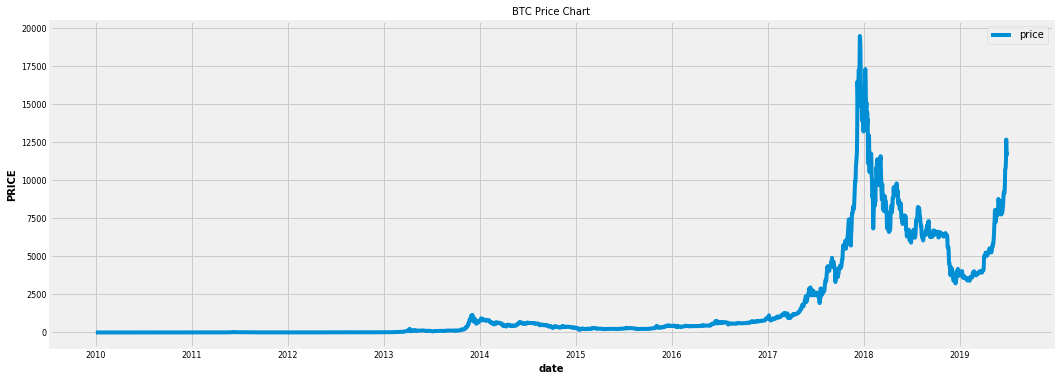

In [14]:
plt.figure(figsize=(16,6))
plt.title('BTC Price Chart')
sns.lineplot(btc_data.index, btc_data['PRICE'], label='price')
plt.xlabel('date')

### 2 & 3)

In [40]:
# lets split our data set before we do analysis on data set to make testing phase completely independent

target = 'PRICE'
base_features = set(btc_data.columns) - set([target])

train_mask = (btc_data.index >= '2010-01-01') & (btc_data.index <= '2018-06-30')
valid_mask = (btc_data.index >= '2018-07-01') & (btc_data.index <= '2018-12-31')
test_mask = (btc_data.index >= '2019-01-01') & (btc_data.index <= '2019-06-30')

X_train =  btc_data.loc[train_mask][base_features]
y_train =  btc_data.loc[train_mask][target]

X_valid =  btc_data.loc[valid_mask][base_features]
y_valid = btc_data.loc[valid_mask][target]

X_test =  btc_data.loc[test_mask][base_features]



#using constant imputer for price volatility
constant_imputer = SimpleImputer(strategy='constant')

#normalizer
normalizer = StandardScaler()

def preprocessing_pipeline(X, train=False):
    if  train:
        X = pd.DataFrame(constant_imputer.fit_transform(X), columns=base_features)
        X = pd.DataFrame(normalizer.fit_transform(X), columns=base_features)
    else:
        X = pd.DataFrame(constant_imputer.transform(X), columns=base_features)
        X = pd.DataFrame(normalizer.transform(X), columns=base_features)
    return X
        
    
X_train = preprocessing_pipeline(X_train, train=True)
print(X_train.head())
X_train.describe()

   TRAN_BLOCK  TRD_VOLUME  MONEY_SUPPLY  BCH_PRICE  HASH_RATE  MINERS_FEE  \
0   -1.004785   -0.754005     -2.256455  -0.742033  -0.383153   -0.514474   
1   -1.004785   -0.753623     -2.254959  -0.742033  -0.383153   -0.514474   
2   -1.004785   -0.754005     -2.253531  -0.742033  -0.383153   -0.514474   
3   -1.004785   -0.674531     -2.251424  -0.742033  -0.383153   -0.514474   
4   -1.004785   -0.754005     -2.249373  -0.742033  -0.383153   -0.514474   

   TRAN_VOL  PRICE_VOL  MINERS_REVENUE  DIFFICULTY  MARKET_CAP  
0 -0.754005  -1.330213        0.646286   -0.384053    -0.41665  
1 -0.753623  -1.330213        0.541164   -0.384053    -0.41665  
2 -0.754005  -1.330213        0.436041   -0.384053    -0.41665  
3 -0.674531  -1.330213        1.487264   -0.384053    -0.41665  
4 -0.754005  -1.330213        1.399662   -0.384053    -0.41665  


,TRAN_BLOCK,TRD_VOLUME,MONEY_SUPPLY,BCH_PRICE,HASH_RATE,MINERS_FEE,TRAN_VOL,PRICE_VOL,MINERS_REVENUE,DIFFICULTY,MARKET_CAP
count,3.103000e+03,3.103000e+03,3.103000e+03,3.103000e+03,3.103000e+03,3.103000e+03,3.103000e+03,3.103000e+03,3.103000e+03,3103.000000,3.103000e+03
mean,2.198263e-16,4.579715e-17,7.327544e-17,7.327544e-17,3.663772e-17,7.327544e-17,4.579715e-17,1.465509e-16,7.327544e-17,0.000000,3.663772e-17
std,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00,1.000161,1.000161e+00
min,-1.004785e+00,-7.540054e-01,-2.256455e+00,-7.420329e-01,-3.831528e-01,-5.144739e-01,-7.540054e-01,-1.330213e+00,-1.336288e+00,-0.384053,-4.166500e-01
25%,-9.274748e-01,-4.012210e-01,-7.333823e-01,-7.305006e-01,-3.831511e-01,-4.323317e-01,-4.012210e-01,-7.202337e-01,-6.429124e-01,-0.384051,-4.155366e-01
50%,-4.329812e-01,-9.633876e-02,2.279986e-01,-3.109474e-01,-3.767819e-01,-3.261878e-01,-9.633876e-02,-1.963286e-01,-3.299806e-01,-0.378312,-3.422109e-01
75%,8.295271e-01,2.191247e-01,8.987545e-01,3.398721e-01,-1.737490e-01,-8.898255e-02,2.191247e-01,5.012500e-01,7.563787e-01,-0.161315,-2.152642e-01
max,2.965203e+00,2.152635e+01,1.255936e+00,6.097450e+00,5.773641e+00,1.256677e+01,2.152635e+01,3.657829e+00,1.035257e+01,5.437957,6.522269e+00


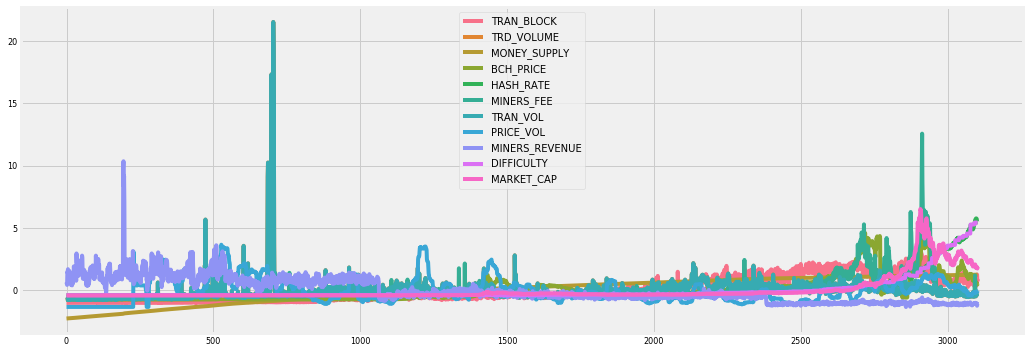

In [55]:
plt.figure(figsize=(16,6))

sns.lineplot(data=X_train, dashes=False)


### 4)

In [63]:
train_corr = X_train.corr()


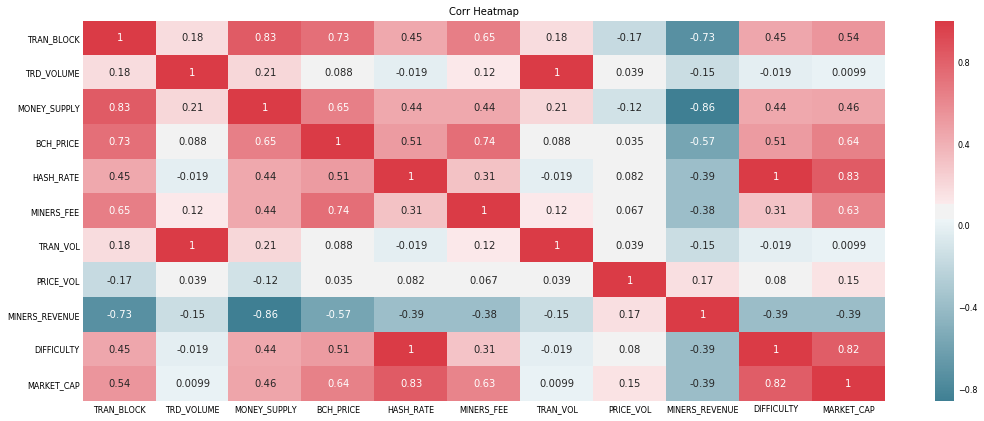

In [65]:
plt.figure(figsize=(16,7))

# Add title
plt.title("Corr Heatmap")
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data=train_corr, annot=True, cmap=cmap)



In [60]:
train_corr[np.abs(train_corr)>0.7]

,TRAN_BLOCK,TRD_VOLUME,MONEY_SUPPLY,BCH_PRICE,HASH_RATE,MINERS_FEE,TRAN_VOL,PRICE_VOL,MINERS_REVENUE,DIFFICULTY,MARKET_CAP
TRAN_BLOCK,1.000000,NaN,0.831965,0.725094,NaN,NaN,NaN,NaN,-0.727261,NaN,NaN
TRD_VOLUME,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
MONEY_SUPPLY,0.831965,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,-0.858138,NaN,NaN
BCH_PRICE,0.725094,NaN,NaN,1.000000,NaN,0.735967,NaN,NaN,NaN,NaN,NaN
HASH_RATE,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.99881,0.825928
MINERS_FEE,NaN,NaN,NaN,0.735967,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
TRAN_VOL,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
PRICE_VOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
MINERS_REVENUE,-0.727261,NaN,-0.858138,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
DIFFICULTY,NaN,NaN,NaN,NaN,0.998810,NaN,NaN,NaN,NaN,1.00000,0.821390


highly correlated

1)Money supply and transections per block 

2)BCH price and transections per block 

3) Market cap and difficulty of mining bitcoin

4) hashrate and difficulty are almost perfectly correlated(we should drop one of thesse)

5) miners fee and bch price

6) transections per block and bch price

7) market cap and hash rate

Negatively corr

1) Miners revenue and transections per block 

2) Miners revenue and money supply(number of bitcoins)





### Observations

1) We have missing values for price volatility

2) Std dev of most of the columns is pretty high since 2010

3) We should reduce highly correlated features (this can be done using greedy algorithms or relying on L1 regularization of NNs)

4) Standardised features are not stationarly which is evident from high shocks(non constant volatility) in the time series plot.



## Part 2

Basic Pre processing and split done in sub parts 2,3 of Part 1.

Now, lets do feture engineering to derive more predictors from past 28 days.
